In [1]:
class Lie_algebra:
    def __init__(self, ring, dimension):
        """
        Constructor of a Lie algebra
        
        Parameters :
           ring : The ring of all the coefficients for the bracket.
           dimension : The dimension of the algebra. (integer)
        
        Examples:
           sage: l = Lie_algebra( SR, 5 ); l
           Lie Algebra of dimension 5
           
        """
        self._ring = ring
        self._n = dimension #The dimension
        self._e = []  #The canonical basis
        self._zero = vector(self._ring, [0 for i in range(self._n)])
        for i in range(dimension):
            l = [ 0 for k in range(dimension)]
            l[i] = 1
            self._e.append( vector(self._ring,l) )
        self._bracket_basis = {}
        for j in range(0,dimension):
            for i in range(0,j):
                self._bracket_basis[ (i,j) ] = [
                    0 for k in range(dimension)
                ]  # [ C_[i,j}^k ]_{0 <= k <= dimension-1}
        self._metric_matrix = [
            [ 0 for j in range(self._n) ]
            for i in range( self._n)
        ]
    def set_metric(self, metric_matrix, check_validity=True):
        """
            Set the metric Matrix.
            
            If check_validity is set to True, the this function will
            raise an error if the metric matrix is not symmetric or
            is degenerate.
            
            Parameters :
                metric_matrix : A matrix
                check_validity : A boolean
            
            EXAMPLES:
            
            
                sage: h = Lie_algebra(SR,3); h
                sage: M = Matrix([[1,3,2],[1,4,3],[2,1,1]])
                sage: M = M - M.transpose()
                sage: h.set_metric( M, check_validity=False )
                sage: h.set_metric( M )
                Traceback (most recent call last):
                ...
                ValueError: The metric matrix is not symmetric.
        """
        if check_validity:
            if not metric_matrix.is_symmetric():
                raise ValueError( "The metric matrix is not symmetric." )
            if metric_matrix.det() == 0:
                raise ValueError( "The metric matrix is degenerate." )
        self._metric_matrix = map(lambda x: list(x),  metric_matrix)
    def set_metric_coefficient(self, i, j, coefficient):
        """
        """
        self._metric_matrix[i][j] = coefficient
    def metric(self):
        return Matrix(self._ring, self._metric_matrix)
    def dimension(self):
        """
        Return the dimension of the Lie algebra.
        
        Examples:
            sage: l = Lie_algebra( SR, 5 );
            sage: l.dimension()
            5
            
        """
        return self._n
    def __repr__(self):
        return "Lie Algebra of dimension " + str(self._n)
    def e(self, j):
        if not( 0 <= j and j < self._n ):
            raise ValueError(
                "The canonical basis are idexed from 0 to " + 
                str(self._n) + " excluded."
            )            
        return self._e[j]
    def canonical_basis( self ):
        return self._e
    def set_braket( self, i, j, vect ):
        if( j<i ):
            vect = - vect
            (i,j) = (j, i)
        self._bracket_basis[ (i,j) ] = list( vect )
    def bracket(self, vect1, vect2):
        """
        Examples:
            sage: l = Lie_algebra( SR, 5 )
            sage: e0, e1, e2, e3, e4 = l.canonical_basis()
            sage: l.set_braket(1,2, 3*e1+ 4*e4 )
            sage: l.set_braket(3,2, e0+ e2 )
            sage: l.bracket( e1+e3 , e2 )
            (1, 3, 1, 0, 4)
            
        """
        res = self._zero
        for j in range(self._n):
            for i in range(j):
                res = res + (
                    ( vect1[i]*vect2[j]  -  vect1[j]*vect2[i] ) * 
                    vector(self._ring, self._bracket_basis[ (i,j) ] )
                )
        return res
    def jacobi(self, u, v, w):
        """
        Examples:
            sage: g = Lie_algebra(SR,3)
            sage: e = g.canonical_basis()
            sage: g.set_braket(0, 1, e[2])
            sage: g.set_braket(1, 2, e[0])
            sage: g.set_braket(2, 0, e[1])
            sage: g.jacobi( e[0], e[1], e[2] )
            0
        """
        return self.bracket(
            u, self.bracket( v, w )
        ) + self.bracket(
            v, self.bracket( w, u )
        ) + self.bracket(
            w, self.bracket( u, v )
        )
    def test_lie_algebra(self):
        """
        Return the list of all triplet
        (i < j < k) that doesn't vanish with the Jacobi identity.
        
        Examples:
            sage: g = Lie_algebra(SR,3)
            sage: e = g.canonical_basis()
            sage: g.set_braket(0, 1, e[2])
            sage: g.set_braket(1, 2, e[0])
            sage: g.set_braket(2, 0, e[1])
            sage: g.is_lie_algebra()
            {}
            
            sage: var('a, b')
            sage: g = Lie_algebra(SR,3)
            sage: e = g.canonical_basis()
            sage: g.set_braket(0, 1, a*e[2]+b*e[1])
            sage: g.set_braket(1, 2, b*e[0]+a*e[2])
            sage: g.set_braket(2, 0, e[1])
            sage: g.is_lie_algebra()
            {(0, 1, 2):(b^2, a, a*b)}            
        """
        res = {}
        for i in range(self._n):
            for j in range(i+1, self._n):
                for k in range(j+1,self._n):
                    jacobi = simplify(
                        self.jacobi(self.e(i), self.e(j), self.e(k))
                    )
                    if jacobi != self._zero:
                        res[(i,j,k)] = jacobi
        return res
    def is_lie_algebra(self):
        """
        Return true if it is a Lie Algebra and False if not.
        """
        return not( self.test_lie_algebra() )
    def adjoint(self, vect):
        """
        Return the adjoint matrix of 'vect'.
        
        Examples:
            sage: var('a, b')
            sage: h = Lie_algebra(SR,3)
            sage: eh = h.canonical_basis()
            sage: h.set_braket(0, 1, a*eh[2]+b*eh[1])
            sage: h.set_braket(1, 2, b*eh[0]+a*eh[2])
            sage: h.set_braket(2, 0, eh[1])
            sage: h.adjoint(eh[0])
            [ 0  0  0]
            [ 0  b -1]
            [ 0  a  0]
            
        """
        res = []
        for i in range(self._n):
            res.append( self.bracket(vect,self.e(i)) )
        return Matrix( self._ring, res ).transpose()
    
    def modular_form( self ):
        """
        Examples:
            sage: var('a, b')
            sage: h = Lie_algebra(SR,3)
            sage: eh = h.canonical_basis()
            sage: h.set_braket(0, 1, a*eh[2]+b*eh[1])
            sage: h.set_braket(1, 2, b*eh[0]+a*eh[2])
            sage: h.set_braket(2, 0, eh[1])
            sage: h.modular_form()
            (b, a, 0)
        """
        res = []
        for i in range(self._n):
            res.append( self.adjoint(self.e(i)).trace() )
        return vector( self._ring, res )
    def killing(self, vect1, vect2):
        """
            Examples:
                sage: var('a, b')
                sage: h = Lie_algebra(SR,3)
                sage: eh = h.canonical_basis()
                sage: h.set_braket(0, 1, a*eh[2]+b*eh[1])
                sage: h.set_braket(1, 2, b*eh[0]+a*eh[2])
                sage: h.set_braket(2, 0, eh[1])
                sage: h.killing( eh[0], eh[0] )
                b^2 - 2*a
                
        """
        return (self.adjoint(vect1)*self.adjoint(vect2)).trace()
    def killing_matrix(self):
        """
        Examples:
            sage: var('a, b')
            sage: h = Lie_algebra(SR,3)
            sage: eh = h.canonical_basis()
            sage: h.set_braket(0, 1, a*eh[2]+b*eh[1])
            sage: h.set_braket(1, 2, b*eh[0]+a*eh[2])
            sage: h.set_braket(2, 0, eh[1])
            sage: h.killing_matrix().is_symmetric()
            True
            
        """
        return Matrix(
            self._ring, self._n,
            lambda i, j: self.killing(self.e(i), self.e(j)) 
        )
    def scalar_product( self, vect1, vect2 ):
        """
        EXAMPLES:
            sage: h = Lie_algebra(SR,3)
            sage: h.set_metric( matrix.identity(SR,3) )
            sage: h.scalar_product( vector(SR, [1,2,3]), vector(SR, [4,5,6] ))
            32
        """
        return vect1 * Matrix(self._ring, self._metric_matrix)* vect2
    def levi_civita_product(self, vect1, vect2):
        """
        Compute the levi-civita product of two vectors.

        EXAMPLES:
            sage: h = Lie_algebra(SR,4)
            sage: e0, e1, e2, e3 = h.canonical_basis()
            sage: h.set_braket( 0, 1, e1 )
            sage: h.set_braket( 0, 2, e2 + e1 )
            sage: h.set_metric(
            ....:     Matrix(
            ....:         SR, 
            ....:         [[0, 1, 0 , 0],[1, 0, 0, 0],[0, 0, 1, 0],[0, 0, 0, 1]] 
            ....:     )
            ....: )
            sage: all( [
            ....:     (
            ....:         h.levi_civita_product( h.e(i), h.e(j) ) - 
            ....:         h.levi_civita_product( h.e(j), h.e(i)) 
            ....:     ) == h.bracket( h.e(i), h.e(j) )
            ....:     for i in range(h.dimension())
            ....:     for j in range(i+1)
            ....: ] )
            True
        """
        def levi( u, v, w):
            return (1/2)*(
                self.scalar_product(
                    self.bracket(u,v), w
                ) + self.scalar_product(
                    self.bracket(w, u), v
                ) + self.scalar_product(
                    self.bracket(w,v), u
                )
            )
                
        return (
            Matrix(
                self._ring,
                self._metric_matrix
            )^(-1) * vector(
                [
                    levi(vect1, vect2, self.e(i))
                    for i in range(self._n)
                ]
            )
        ) 
    def left_levi(self, vect):
        """
        Return the matrix of the left multiplication for Levi-Civita product
        of vect.
        
        EXAMPLES:
            sage: h = Lie_algebra(SR,4)
            sage: e0, e1, e2, e3 = h.canonical_basis()
            sage: h.set_braket( 0, 1, e1 )
            sage: h.set_braket( 0, 2, e2 + e1 )
            sage: h.set_metric(
            ....:     Matrix(
            ....:         SR, 
            ....:         [[0, 1, 0 , 0],[1, 0, 0, 0],[0, 0, 1, 0],[0, 0, 0, 1]] 
            ....:     )
            ....: )
            sage: all( [
            ....:     h.left_levi(h.e(i)) - h.right_levi(h.e(i)) == h.adjoint(h.e(i))
            ....:     for i in range(h.dimension())
            ....: ] )
            True        
            
        """
        res = []
        for i in range(self._n):
            res.append( self.levi_civita_product(vect,self.e(i)) )
        return Matrix( self._ring, res ).transpose()    

    def right_levi(self, vect):
        """
        Return the matrix of the right multiplication for Levi-Civita product
        of vect.
        
        EXAMPLES:
            sage: h = Lie_algebra(SR,4)
            sage: e0, e1, e2, e3 = h.canonical_basis()
            sage: h.set_braket( 0, 1, e1 )
            sage: h.set_braket( 0, 2, e2 + e1 )
            sage: h.set_metric(
            ....:     Matrix(
            ....:         SR, 
            ....:         [[0, 1, 0 , 0],[1, 0, 0, 0],[0, 0, 1, 0],[0, 0, 0, 1]] 
            ....:     )
            ....: )
            sage: all( [
            ....:     h.left_levi(h.e(i)) - h.right_levi(h.e(i)) == h.adjoint(h.e(i))
            ....:     for i in range(h.dimension())
            ....: ] )
            True
        """
        res = []
        for i in range(self._n):
            res.append( self.levi_civita_product(self.e(i), vect) )
        return Matrix( self._ring, res ).transpose()    
    def curvature( self, vect1, vect2):
        """
        Compute the curvature of vact1 and vect2.
        
        Examples:
        
            sage: h = Lie_algebra(SR,4)
            sage: e0, e1, e2, e3 = h.canonical_basis()
            sage: h.set_braket( 0, 1, e1 )
            sage: h.set_braket( 0, 2, e2 + e1 )
            sage: h.set_metric(
            ....:     Matrix(
            ....:         SR, 
            ....:         [[0, 1, 0 , 0],[1, 0, 0, 0],[0, 0, 1, 0],[0, 0, 0, 1]] 
            ....:     )
            ....: )        
            sage: all( [
            sage:     h.curvature( h.e(i), h.e(j) ) == matrix.zero(h.dimension())
            sage:     for i in range(h.dimension())
            sage:     for j in range(i+1)
            sage: ] )
            True
        """
        return (
            self.left_levi(vect1) * self.left_levi(vect2) -
            self.left_levi(vect2) * self.left_levi(vect1) -
            self.left_levi( self.bracket( vect1, vect2) )
        )
    def ricci_curvature(self, vect1, vect2):
        """
        Return the RIcci Curvature of two vectors.
        
        Examples:
            sage: h = Lie_algebra(SR,4)
            sage: e0, e1, e2, e3 = h.canonical_basis()
            sage: h.set_braket( 0, 1, e1 )
            sage: h.set_braket( 0, 2, e2 + e1 )
            sage: h.set_metric(
            ....:     Matrix(
            ....:         SR, 
            ....:         [[0, 1, 0 , 0],[1, 0, 0, 0],[0, 0, 1, 0],[0, 0, 0, 1]] 
            ....:     )
            ....: )
            sage: all( [
            ....:     h.ricci_curvature( h.e(i), h.e(j) ) == 0
            ....:    for i in range(h.dimension())
            ....:    for j in range(i+1)
            ....: ] )
            True
        """
        return (
            - (self.right_levi(vect1)*self.right_levi(vect2)).trace() +
            self.right_levi( self.levi_civita_product(vect1,vect2)  ).trace() 
        )
    def ricci_matrix( self ):
        """
        Examples:
            sage: h = Lie_algebra(SR,4)
            sage: e0, e1, e2, e3 = h.canonical_basis()
            sage: h.set_braket( 0, 1, e1 )
            sage: h.set_braket( 0, 2, e2 + e1 )
            sage: h.set_metric(
            ....:     Matrix(
            ....:         SR, 
            ....:         [[0, 1, 0 , 0],[1, 0, 0, 0],[0, 0, 1, 0],[0, 0, 0, 1]] 
            ....:     )
            ....: )
            sage: h.ricci_matrix() 
            [0 0 0 0]
            [0 0 0 0]
            [0 0 0 0]
            [0 0 0 0]
        """
        return Matrix( 
            self._ring, self._n, 
            lambda i, j: self.ricci_curvature( self.e(i), self.e(j) )
        )
    def ricci_operator( self ):
        """
        Return the Ricci operator.
        
        Examples:
            sage: h = Lie_algebra(SR,4)
            sage: e0, e1, e2, e3 = h.canonical_basis()
            sage: h.set_braket( 0, 1, e1 )
            sage: h.set_braket( 0, 2, e2 + e1 )
            sage: h.set_metric(
            ....:     Matrix(
            ....:         SR, 
            ....:         [[0, 1, 0 , 0],[1, 0, 0, 0],[0, 0, 1, 0],[0, 0, 0, 1]] 
            ....:     )
            ....: )
            sage: h.ricci_operator() 
            [0 0 0 0]
            [0 0 0 0]
            [0 0 0 0]
            [0 0 0 0]
        """
        return (
            Matrix( self._ring, self._metric_matrix)^(-1) * 
            self.ricci_matrix()
        )
    def scalar_curvature(self):
        """
        Return the scalar curvature.
        
        Examples:
            sage: h = Lie_algebra(SR,4)
            sage: e0, e1, e2, e3 = h.canonical_basis()
            sage: h.set_braket( 0, 1, e1 )
            sage: h.set_braket( 0, 2, e2 + e1 )
            sage: h.set_metric(
            ....:     Matrix(
            ....:         SR, 
            ....:         [[0, 1, 0 , 0],[1, 0, 0, 0],[0, 0, 1, 0],[0, 0, 0, 1]] 
            ....:     )
            ....: )
            sage: h.scalar_curvature()
            0
        """
        return self.ricci_operator().trace()

In [ ]:
        print( "vect1 : " + str(vect1) )
        print( "vect2 : " + str(vect2) )
        print( "bracket : " + self.bracket(vect1,vect2)  )
        print( "right levi vect1: " + str(elf.right_levi(vect1)) )
        print( "right levi vect2: " + str(elf.right_levi(vect2)) )
        print( "" )

In [ ]:
Matrix?

In [ ]:
l = Lie_algebra( SR, 5 ); l

In [ ]:
e0, e1, e2, e3, e4 = l.canonical_basis()

In [ ]:
l.set_braket(1,2, 3*e1+ 4*e4 )

In [ ]:
l.set_braket(3,2, e0+ e2 )

In [ ]:
l._bracket_basis

In [ ]:
l.bracket( e1+e3 , e2 )

In [ ]:
l

In [ ]:
l.dimension()

In [ ]:
g = Lie_algebra(SR,3)

In [ ]:
e = g.canonical_basis()

In [ ]:
g.set_braket(0, 1, e[2])
g.set_braket(1, 2, e[0])
g.set_braket(2, 0, e[1])

In [ ]:
g._bracket_basis

In [ ]:
g.jacobi( e[0], e[1], e[2] )

In [ ]:
g.is_lie_algebra()


In [ ]:
var('a, b')
h = Lie_algebra(SR,3)
eh = h.canonical_basis()
h.set_braket(0, 1, a*eh[2]+b*eh[1])
h.set_braket(1, 2, b*eh[0]+a*eh[2])
h.set_braket(2, 0, eh[1])
h.test_lie_algebra()

In [ ]:
h.adjoint(eh[2])

In [ ]:
h.modular_form()

In [ ]:
h._bracket_basis

In [ ]:
h.killing( eh[0], eh[0] )

In [ ]:
h.adjoint(eh[0])^2

In [ ]:
M = h.killing_matrix()

In [ ]:
M.is_symmetric()

In [ ]:
map( lambda x: list(x),  matrix.identity(4))

In [ ]:
h = Lie_algebra(SR,3); h

In [ ]:
h = Lie_algebra(SR,3); h
M = Matrix([[1,3,2],[1,4,3],[2,1,1]])
M = M - M.transpose()
h.set_metric( M )

In [ ]:
h._metric_matrix

In [ ]:
h.set_metric_coefficient(0,1, 42)

In [ ]:
h.metric()

In [ ]:
h = Lie_algebra(SR,3)
h.set_metric( matrix.identity(SR,3) )
h.scalar_product( vector(SR, [1,2,3]), vector(SR, [4,5,6] ))

In [ ]:
h = Lie_algebra(SR,4)
e0, e1, e2, e3 = h.canonical_basis()
h.set_braket( 0, 1, e1 )
h.set_braket( 0, 2, e2 + e1 )
h.set_metric(
    Matrix(
        SR, 
        [[0, 1, 0 , 0],[1, 0, 0, 0],[0, 0, 1, 0],[0, 0, 0, 1]] 
    )
)

all( [
    (
        h.levi_civita_product( h.e(i), h.e(j) ) - 
        h.levi_civita_product( h.e(j), h.e(i)) 
    ) == h.bracket( h.e(i), h.e(j) )
    for i in range(h.dimension())
    for j in range(i+1)
] )


In [ ]:
h = Lie_algebra(SR,4)
e0, e1, e2, e3 = h.canonical_basis()
h.set_braket( 0, 1, e1 )
h.set_braket( 0, 2, e2 + e1 )
h.set_metric(
    Matrix(
        SR, 
        [[0, 1, 0 , 0],[1, 0, 0, 0],[0, 0, 1, 0],[0, 0, 0, 1]] 
    )
)



In [ ]:
h = Lie_algebra(SR,4)
e0, e1, e2, e3 = h.canonical_basis()
h.set_braket( 0, 1, e1 )
h.set_braket( 0, 2, e2 + e1 )
h.set_metric(
    Matrix(
        SR, 
        [[0, 1, 0 , 0],[1, 0, 0, 0],[0, 0, 1, 0],[0, 0, 0, 1]] 
    )
)

all( [
    h.curvature( h.e(i), h.e(j) ) == matrix.zero(h.dimension())
    for i in range(h.dimension())
    for j in range(i+1)
] )



In [ ]:
h = Lie_algebra(SR,4)
e0, e1, e2, e3 = h.canonical_basis()
h.set_braket( 0, 1, e1 )
h.set_braket( 0, 2, e2 + e1 )
h.set_metric(
    Matrix(
        SR, 
        [[0, 1, 0 , 0],[1, 0, 0, 0],[0, 0, 1, 0],[0, 0, 0, 1]] 
    )
)

In [ ]:
all( [
    h.ricci_curvature( h.e(i), h.e(j) ) == 0
    for i in range(h.dimension())
    for j in range(i+1)
] )

In [ ]:
h.ricci_curvature( e0, e0 )

In [ ]:
h.ricci_matrix()

In [ ]:
h.ricci_operator()

In [ ]:
h.scalar_curvature()

# Exemple de l'article : 

In [2]:
var('a')
hflat = Lie_algebra(SR,6)
e = hflat.canonical_basis()
hflat.set_braket( 0, 2, e[3] )
hflat.set_braket( 0, 3, -e[2] )
hflat.set_braket( 0, 4, a*e[2]+e[5] )
hflat.set_braket( 0, 5, a*e[3]-e[4] )
hflat.set_braket( 2, 4, -a*e[1] )
hflat.set_braket( 3, 5, -a*e[1] )
hflat.set_braket( 4, 5, 2*a^2*e[1])
hflat.set_metric(
    Matrix(
        SR,
        [
            [0, 1,   0,    0,     0,     0],
            [1, 0,   0,    0,     0,     0],
            [0, 0,   1,    0,     0,   2*a],
            [0, 0,   0,    1,  -2*a,     0],
            [0, 0,   0, -2*a, 1+a^2,     0],
            [0, 0, 2*a,    0,     0, 1+a^2]
        ]
    )
)

In [3]:
hflat.metric()

[      0       1       0       0       0       0]
[      1       0       0       0       0       0]
[      0       0       1       0       0     2*a]
[      0       0       0       1    -2*a       0]
[      0       0       0    -2*a a^2 + 1       0]
[      0       0     2*a       0       0 a^2 + 1]

In [4]:
hflat.is_lie_algebra()

True

In [ ]:
hflat.levi_civita_product( e[1], e[0] )

In [ ]:
hflat.bracket( e[0], e[2] )

In [8]:
hflat.levi_civita_product( e[0], e[2] )

(0, 0, 0, 1, 0, 0)

In [14]:
hflat.left_levi( e[0] )

[                                                         0                                                          0                                                          0                                                          0                                                          0                                                          0]
[                                                         0                                                          0                                                          0                                                          0                                                          0                                                          0]
[                                                         0                                                          0                                                          0                                                         -1 -2*a*(4*a^2/(3*a^2 - 1) - 1) + 2*(2*a^2 + 1)*a/(3*a

In [20]:
erreur = {}
for i in range(hflat.dimension()):
    for j in range(i+1):
        res = hflat.curvature(e[i], e[j])
        if res != matrix.zero(SR, hflat.dimension()) :
            erreur[(i,j)] = res

In [22]:
erreur.keys()

[(5, 0), (4, 0)]

In [23]:
erreur[(4,0)]

[                                                                                                                    0                                                                                                                     0                                                                                                                     0                                                                                                                     0                                                                                                                     0                                                                                                                     0]
[                                                                                                                    0                                                                                                                     0                                                      

In [38]:
var('x,y')

(x, y)

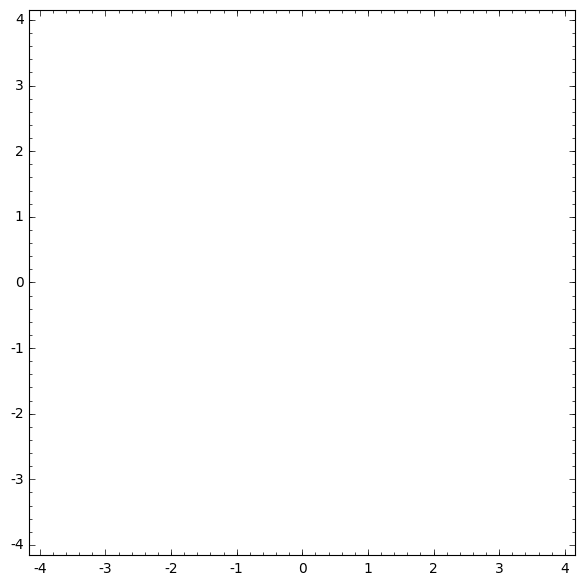

In [39]:
implicit_plot(5*x^2 + 4*x*y+3*y^2==0, (x,-4,4), (y,-4,4))

In [40]:
implicit_plot?